In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [2]:
dataset = pd.read_csv('msc_dataset.txt', sep="\t")

In [53]:
dataset.head()

,TRX_aff_L12M_COL_PTS,TRX_aff_L12M_PUR_AMT,TRX_aff_L12M_RED_CNT,TRX_aff_L12M_RED_PTS,TRX_aff_L3M_BASE_PTS,TRX_aff_L3M_COL_CNT,TRX_aff_L3M_PROMO_PTS,TRX_aff_L3M_PUR_AMT,TRX_aff_L3M_RED_CNT,TRX_aff_L3M_RED_PTS,...,WEB_REW_UNQ_SES_CNT_L3M,WEB_REW_TIME_SPEND_L3M,WEB_REW_UNQ_SES_CNT_L6M,WEB_REW_TIME_SPEND_L6M,WEB_REW_UNQ_SES_CNT_L12M,WEB_REW_TIME_SPEND_L12M,event,id,oferta,kategoria
0,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,1,114,0,1,NaN,NaN
1,0,0.0,0,0,0,0,0,0.0,0,0,...,1,1193,3,2288,5,4844,0,2,NaN,NaN
2,0,0.0,0,0,0,0,0,0.0,0,0,...,1,5,2,77,3,1663,0,3,NaN,NaN
3,0,0.0,0,0,0,0,0,0.0,0,0,...,1,30,1,30,11,1574,0,4,NaN,NaN
4,0,0.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,5,NaN,NaN


In [3]:
dataset['CUST_CA_AAA_FLG'] = dataset.CUST_CA_AAA_FLG.map({'Y' : 1, 'N' : 0})
dataset['CUST_CA_BBB_FLG'] = dataset.CUST_CA_BBB_FLG.map({'Y' : 1, 'N' : 0})
dataset['CUST_CA_CCC_FLG'] = dataset.CUST_CA_CCC_FLG.map({'Y' : 1, 'N' : 0})

In [57]:
dataset.columns

Index(['TRX_aff_L12M_COL_PTS', 'TRX_aff_L12M_PUR_AMT', 'TRX_aff_L12M_RED_CNT',
       'TRX_aff_L12M_RED_PTS', 'TRX_aff_L3M_BASE_PTS', 'TRX_aff_L3M_COL_CNT',
       'TRX_aff_L3M_PROMO_PTS', 'TRX_aff_L3M_PUR_AMT', 'TRX_aff_L3M_RED_CNT',
       'TRX_aff_L3M_RED_PTS', 'TRX_all_L12M_PROMO_PTS', 'TRX_all_L12M_PUR_AMT',
       'TRX_all_L12M_PUR_PTS', 'TRX_all_L12M_RED_CNT', 'TRX_all_L12M_RED_PTS',
       'TRX_all_L3M_BASE_PTS', 'TRX_all_L3M_COL_CNT', 'TRX_all_L3M_PROMO_PTS',
       'TRX_all_L3M_PUR_AMT', 'TRX_all_L3M_RED_CNT', 'TRX_all_L3M_RED_PTS',
       'ACCT_BAL_MOD_CNT', 'ACCT_TOT_COL_AMT', 'ACCT_UNBLOCKED_POINTS',
       'TIME_FROM_ENRL', 'TIME_FROM_FIRST_DT', 'TIME_FROM_LAST_DT',
       'CARDA_PAYM_CNT', 'ACCT_PTS_EXPIRED', 'ACCT_PTS_TO_EXPIRE',
       'CUST_GFK_POPULATION', 'CUST_GFK_HOUSEHOLDS', 'CUST_HH_SIZE',
       'CUST_PROFESSION_CD', 'CUST_AGE', 'CUST_GENDER', 'CUST_CA_AAA_FLG',
       'CUST_CA_BBB_FLG', 'CUST_CA_CCC_FLG', 'CUST_CA_BBB_KM_CNT',
       'CUST_CA_AAA_KM_CNT', 'CUS

In [152]:
dataset['CUST_CA_AAA_KM_CNT']

0          0.00
1          6.18
2          6.29
3          9.16
4          3.35
5          5.92
6         10.72
7          7.73
8          3.07
9         11.91
10         3.78
11         4.83
12         5.31
13         6.29
14         6.29
15         6.95
16        12.37
17         7.52
18         7.73
19         0.45
20        26.35
21         7.73
22         9.50
23        10.58
24         2.04
25        19.40
26         6.29
27        22.03
28        52.49
29         2.51
          ...  
226242     3.59
226243    75.27
226244     6.85
226245     4.05
226246    76.99
226247     2.94
226248     2.75
226249     2.59
226250     4.51
226251     3.20
226252    16.48
226253     6.38
226254    12.74
226255    46.20
226256    14.94
226257     6.39
226258     3.20
226259     4.51
226260     3.61
226261     5.15
226262     0.93
226263    74.61
226264     5.15
226265    52.18
226266    63.85
226267     7.43
226268     5.34
226269     4.06
226270    25.17
226271     0.00
Name: CUST_CA_AAA_KM_CNT

In [4]:
len(dataset)

226272

In [8]:
dataset.query('event == 1').count()

TRX_aff_L12M_COL_PTS        1772
TRX_aff_L12M_PUR_AMT        1772
TRX_aff_L12M_RED_CNT        1772
TRX_aff_L12M_RED_PTS        1772
TRX_aff_L3M_BASE_PTS        1772
TRX_aff_L3M_COL_CNT         1772
TRX_aff_L3M_PROMO_PTS       1772
TRX_aff_L3M_PUR_AMT         1772
TRX_aff_L3M_RED_CNT         1772
TRX_aff_L3M_RED_PTS         1772
TRX_all_L12M_PROMO_PTS      1772
TRX_all_L12M_PUR_AMT        1772
TRX_all_L12M_PUR_PTS        1772
TRX_all_L12M_RED_CNT        1772
TRX_all_L12M_RED_PTS        1772
TRX_all_L3M_BASE_PTS        1772
TRX_all_L3M_COL_CNT         1772
TRX_all_L3M_PROMO_PTS       1772
TRX_all_L3M_PUR_AMT         1772
TRX_all_L3M_RED_CNT         1772
TRX_all_L3M_RED_PTS         1772
ACCT_BAL_MOD_CNT            1772
ACCT_TOT_COL_AMT            1772
ACCT_UNBLOCKED_POINTS       1772
TIME_FROM_ENRL              1772
TIME_FROM_FIRST_DT          1772
TIME_FROM_LAST_DT           1772
CARDA_PAYM_CNT              1772
ACCT_PTS_EXPIRED            1772
ACCT_PTS_TO_EXPIRE          1772
          

In [5]:
X = dataset.drop(labels=['event', 'oferta', 'kategoria', 'id'], axis=1)

In [6]:
Y = dataset.event

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [9]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(169704, 56568, 169704, 56568)

In [45]:
len(Y_train[Y_train==1]) , len(Y_test[Y_test==1])

(1326, 446)

Over Sampling

In [10]:
from imblearn import over_sampling

In [20]:
adasyn = over_sampling.ADASYN(ratio=0.3, random_state=42)

In [21]:
X_resampled, Y_resampled = adasyn.fit_sample(X_train, Y_train)

C:\Apps\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [22]:
len(Y_resampled), len(Y_resampled[Y_resampled==1])

(219234, 50856)

Standardyzacja

In [7]:
from sklearn.preprocessing import StandardScaler

In [23]:
X_resampled_sc = StandardScaler().fit(X_resampled).transform(X_resampled)

In [24]:
X_resampled_sc

array([[-0.05649813, -0.03497389,  0.        , ..., -0.30415447,
        -0.5053436 , -0.34486782],
       [-0.05649813, -0.03497389,  0.        , ..., -0.0568889 ,
        -0.22813505, -0.17485877],
       [-0.05649813, -0.03497389,  0.        , ..., -0.30415447,
        -0.5053436 , -0.34486782],
       ..., 
       [-0.05649813, -0.03497389,  0.        , ..., -0.24608591,
        -0.08313685, -0.25337582],
       [-0.05649813, -0.03497389,  0.        , ..., -0.25319185,
         0.12665821, -0.0266761 ],
       [-0.05649813, -0.03497389,  0.        , ..., -0.24048202,
        -0.31713327, -0.25612338]])

In [25]:
X_test_sc = StandardScaler().fit(X_test).transform(X_test)

Baseline Models

In [26]:
from sklearn.neural_network import MLPClassifier

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [117]:
mlp = MLPClassifier(hidden_layer_sizes=(4, 6), early_stopping=True)

In [118]:
mlp.fit(X_resampled_sc, Y_resampled)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(4, 6), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [119]:
predictions = mlp.predict(X_test_sc)

In [120]:
print(confusion_matrix(Y_test, predictions))

[[46182  9940]
 [  108   338]]


In [121]:
print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90     56122
          1       0.03      0.76      0.06       446

avg / total       0.99      0.82      0.90     56568



In [33]:
from sklearn.linear_model import LogisticRegression as LR

In [34]:
linreg = LR(C=1e5)

In [35]:
linreg.fit(X_resampled_sc, Y_resampled)
pred = linreg.predict(X_test_sc)

In [36]:
print(confusion_matrix(Y_test, pred))

[[49909  6213]
 [  115   331]]


In [123]:
print(classification_report(Y_test, pred))

             precision    recall  f1-score   support

          0       1.00      0.89      0.94     56122
          1       0.05      0.74      0.09       446

avg / total       0.99      0.89      0.93     56568



In [150]:
confusion_matrix(Y_test, pred)

array([[49909,  6213],
       [  115,   331]], dtype=int64)

ReLu Function:

In [138]:
x = np.arange(-5, 6, 1)
y = [max(0, x) for x in x] 

In [139]:
x

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [140]:
y

[0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5]

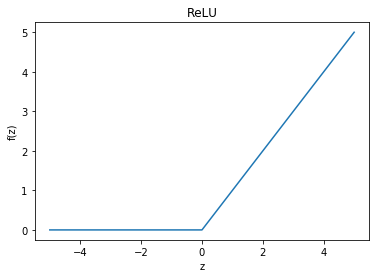

In [146]:
plt.plot(x, y)
plt.title('ReLU')
plt.ylabel('f(z)')
plt.xlabel('z')